**REGRESSION AND CLASSIFICATION WITH ANN**


**REGRESSION**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


PREPROCESSING

([<matplotlib.patches.Wedge at 0x7f6b17370c40>,
 [Text(0.3888223589862547, 1.0289884222635182, 'high'),
  Text(-1.0563230795297933, -0.3068901296110612, 'low'),
  Text(0.660462119378317, -0.8796532208014144, 'normal')],
 [Text(0.21208492308341165, 0.5612664121437371, '38.5%'),
  Text(-0.576176225198069, -0.1673946161514879, '32.0%'),
  Text(0.3602520651154456, -0.4798108477098623, '29.5%')])

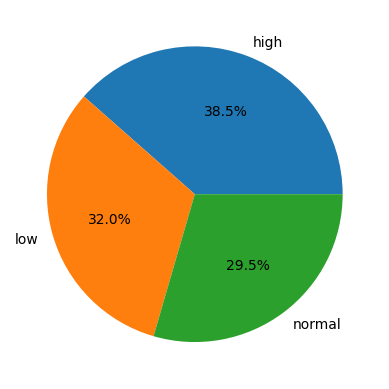

In [7]:
plt.pie(df.BP.value_counts(),labels=['high','low','normal'],autopct='%1.1f%%')

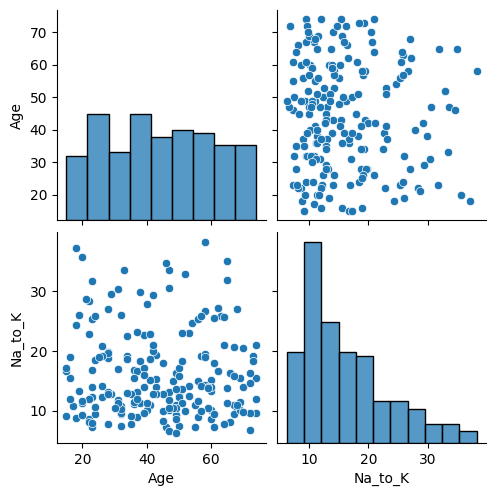

In [8]:
sns.pairplot(df)

<ipython-input-9-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

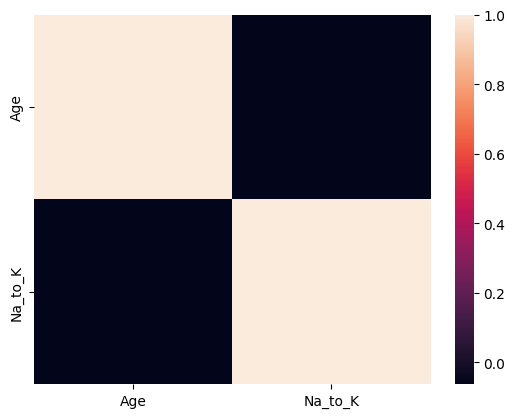

In [9]:
sns.heatmap(df.corr())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

SPLITTING DEPENDENT AND INDEPENDANT VALUES

In [13]:
x=df.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [14]:
y=df.iloc[:,5:]
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


SPLITTING THE DATA INTO TRAINING AND TESTIMG DATA

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

ENCODING THE CATEGORICAL DATA USING LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['Sex']=le.fit_transform(x_train['Sex'])
x_test['Sex']=le.transform(x_test['Sex'])
x_train['BP']=le.fit_transform(x_train['BP'])
x_test['BP']=le.transform(x_test['BP'])
x_train['Cholesterol']=le.fit_transform(x_train['Cholesterol'])
x_test['Cholesterol']=le.transform(x_test['Cholesterol'])
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,1,19.161
47,68,1,1,0,10.291
94,56,1,1,0,15.015
14,50,0,2,0,12.703
41,58,0,0,1,14.239
...,...,...,...,...,...
3,28,0,2,0,7.798
130,70,0,2,0,20.489
134,42,0,0,0,21.036
155,49,1,1,0,10.537


In [17]:
y_train['Drug']=le.fit_transform(y_train['Drug'])
y_test['Drug']=le.transform(y_test['Drug'])
y_train

,Drug
77,0
47,3
94,0
14,4
41,2
...,...
3,4
130,0
134,0
155,3


BUILDING THE ANN MODEL

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# initiizing the model
model=Sequential()
# adding the input layer
model.add(Dense(4,activation='relu'))
# adding the 1st hidden layer
model.add(Dense(64,activation='relu'))
#adding the 2nd hidden layer
model.add(Dense(32,activation='relu'))
#adding the 3rd hidden layer
model.add(Dense(16,activation='relu'))
#adding the output layer
model.add(Dense(1,activation='linear'))


In [19]:
model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x_train,y_train,batch_size=4,epochs=10)

Epoch 1/10
40/40 [==============================] - 2s 2ms/step - loss: 3.4832
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 2.9484
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 2.9952
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 2.7926
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 2.9529
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 3.0817
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 2.9593
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 2.6161
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 2.5461
Epoch 10/10
40/40 [==============================] - 0s 5ms/step - loss: 2.6031


TESTING THE MODEL

In [21]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


COMPARING PREDICTED WITH ACTUAL VALUES

In [22]:
comp=pd.DataFrame(y_test)
comp.columns=['Actual value']
comp['predicted value'] = y_pred
comp

,Actual value,predicted value
23,0,1.261816
182,4,0.678268
172,0,0.679683
21,0,0.705912
63,4,1.720563
11,0,0.645697
61,1,0.724398
32,4,1.672134
164,0,0.172813
7,3,1.455690


Testing the model with random data

In [23]:
model.predict([[20,1,2,2,7.7]])

1/1 [==============================] - 0s 102ms/step


array([[0.6561013]], dtype=float32)

**CLASSIFICATION**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [26]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [27]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

df['BP']=le.fit_transform(df['BP'])

df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [28]:
x=pd.get_dummies(df.iloc[:,1:5]).values
x


array([[ 0.   ,  0.   ,  0.   , 25.355],
       [ 1.   ,  1.   ,  0.   , 13.093],
       [ 1.   ,  1.   ,  0.   , 10.114],
       [ 0.   ,  2.   ,  0.   ,  7.798],
       [ 0.   ,  1.   ,  0.   , 18.043],
       [ 0.   ,  2.   ,  0.   ,  8.607],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 1.   ,  1.   ,  0.   , 11.037],
       [ 1.   ,  2.   ,  0.   , 15.171],
       [ 1.   ,  1.   ,  1.   , 19.368],
       [ 0.   ,  1.   ,  0.   , 11.767],
       [ 0.   ,  0.   ,  1.   , 19.199],
       [ 1.   ,  1.   ,  0.   , 15.376],
       [ 0.   ,  1.   ,  0.   , 20.942],
       [ 0.   ,  2.   ,  0.   , 12.703],
       [ 0.   ,  0.   ,  1.   , 15.516],
       [ 1.   ,  1.   ,  1.   , 11.455],
       [ 1.   ,  0.   ,  0.   , 13.972],
       [ 1.   ,  1.   ,  0.   ,  7.298],
       [ 0.   ,  0.   ,  1.   , 25.974],
       [ 1.   ,  1.   ,  1.   , 19.128],
       [ 1.   ,  2.   ,  0.   , 25.917],
       [ 1.   ,  1.   ,  1.   , 30.568],
       [ 0.   ,  1.   ,  0.   , 15.036],
       [ 0.   , 

In [29]:
y=pd.get_dummies(df.iloc[:,5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)
x_train

array([[ 0.   ,  0.   ,  1.   , 19.161],
       [ 1.   ,  1.   ,  0.   , 10.291],
       [ 1.   ,  1.   ,  0.   , 15.015],
       [ 0.   ,  2.   ,  0.   , 12.703],
       [ 0.   ,  0.   ,  1.   , 14.239],
       [ 0.   ,  0.   ,  1.   , 25.969],
       [ 1.   ,  1.   ,  0.   , 15.376],
       [ 1.   ,  1.   ,  1.   , 32.922],
       [ 1.   ,  1.   ,  1.   , 11.939],
       [ 0.   ,  1.   ,  0.   , 33.486],
       [ 1.   ,  2.   ,  0.   , 15.171],
       [ 0.   ,  2.   ,  0.   , 19.221],
       [ 0.   ,  0.   ,  0.   , 37.188],
       [ 1.   ,  2.   ,  1.   ,  7.845],
       [ 0.   ,  2.   ,  1.   ,  8.107],
       [ 1.   ,  0.   ,  1.   ,  8.621],
       [ 0.   ,  0.   ,  1.   , 31.876],
       [ 1.   ,  1.   ,  0.   ,  8.151],
       [ 0.   ,  0.   ,  1.   , 15.516],
       [ 0.   ,  1.   ,  0.   , 11.567],
       [ 1.   ,  1.   ,  1.   , 20.693],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 0.   ,  1.   ,  1.   , 11.349],
       [ 0.   ,  0.   ,  1.   , 12.495],
       [ 1.   , 

In [31]:
#Bulid a ANN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#intialize the sequence model
cla_model=Sequential()
#adding the input layer to the model
cla_model.add(Dense(5,activation='relu'))
#adding the 1st hidden layer to the model
cla_model.add(Dense(64,activation='relu'))
#adding the 2nd hidden layer to the model
cla_model.add(Dense(32,activation='relu'))
#adding the 3rd hidden layer to the model
cla_model.add(Dense(24,activation='relu'))
#adding output layer
cla_model.add(Dense(5,activation='softmax'))

In [32]:
# Compiling the skeleton with loss and gradient decent
cla_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
# Training the model
cla_model.fit(x_train,y_train,batch_size=4,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.8589 - accuracy: 0.6687 - val_loss: 0.8656 - val_accuracy: 0.7250
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.6687 - val_loss: 0.9077 - val_accuracy: 0.6750
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.6812 - val_loss: 0.8011 - val_accuracy: 0.7250
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.6875 - val_loss: 0.8010 - val_accuracy: 0.7250
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7767 - accuracy: 0.7000 - val_loss: 0.7874 - val_accuracy: 0.7000
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.7000 - val_loss: 0.7725 - val_accuracy: 0.7250
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.6750 - val_loss: 0.8180 - val_accuracy: 0.6750
Epoch 8/10
40/40 [==

In [38]:
y_pred=cla_model.predict(x_test)

2/2 [==============================] - 0s 12ms/step
